# Sinusoids, Dot Produce and Fourier Series 

In previous, all of mathermatic modeling is based on time domain function and analysis. This week we will learn important milestone in scientific and technology evalution. Frequency domain processing which is application in signal processing in mobile/computer communicaiton, image/vision processing and so on.

We will learning what is inside Fourier Series. Begin with fundamental of oscillion on sinusoid signals because we can create any real world signals from sinusoids that is principle of Fourier Series and Analysis.



### Motivation 

Joseph Fourier (1768 - 1830), any real world signal can be created by combination of sin waves.

The following code show that we can create **square signal from combination of sin signals**

Text(0.5, 1.0, 'Approximating square wave using sum of sine ')

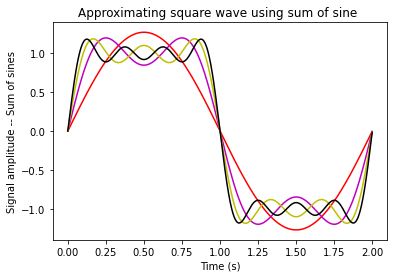

In [38]:
from matplotlib import pyplot as plt
import numpy as np 
from numpy import pi as Pi 


Ts = 0.001 # 1 KHz sampling rate 
T = 2 # 4 sec sample
t= np.arange(0,T,Ts) # linear space between 0

sig1 = (4/Pi)*np.sin((Pi)*t)
sig2 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) 
sig3 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) \
        +(4/(5*Pi))*np.sin(5*Pi*t)
sig4 = (4/Pi)*np.sin((Pi)*t)+ (4/(3*Pi))*np.sin(3*Pi*t) \
        +(4/(5*Pi))*np.sin(5*Pi*t)+(4/(7*Pi))*np.sin(7*Pi*t)


plt.plot(t,sig1,'r-')
plt.plot(t,sig2,'m-')
plt.plot(t,sig3,'y-')
plt.plot(t,sig4,'k-')

plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude -- Sum of sines')
plt.title('Approximating square wave using sum of sine ')
# source https://github.com/mayankgrd/signal-processing-python-tutorial/blob/master/sp-python-intro-pt3.ipynb

## Time Domain

We will review how to create signal in time domain. 

### Sinusoidal Signal
The time-varying oscillation signals  can be described mathematically as:
$$A\sin(2πft+θ)$$ 
where  $f$  is the frequency 
or the speed of the oscillation 
described in the number of cycles per second -  Hz .

and $A$  refers to the height of the signals, which is half the distance of the peak.
$\theta$ : is the initial position of phase of the signal.







The another form of sin signal is in angular frequency ω, is a scalar measure of rotation rate.

(also referred to by the terms angular speed, radial frequency, circular frequency, orbital frequency, radian frequency, and pulsatance) 

One revolution is equal to $2π$ radians, hence :

$$ \omega = \frac{2π}{T} = 2πf$$

$$ y(t) = A\sin(\omega t+θ)$$  

where:

$ω$ is the angular frequency or angular speed (measured in radians per second),

$T$ is the period (measured in seconds),

$f$ is the ordinary frequency (measured in hertz) (sometimes symbolised with ν).

Source:
https://en.wikipedia.org/wiki/Angular_frequency

Next we will play how to create sin() signal.


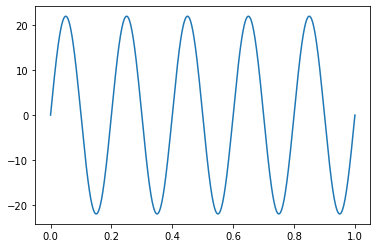

In [39]:
from numpy import sin, pi, arange
from matplotlib import pyplot as plt

sampling_freq = 1024
time = arange(0, 1 + 1/sampling_freq, 1/sampling_freq)
amplitude = 22
freq = 5
theta = 0

simulation = amplitude * sin(2 * pi * freq * time + theta)
plt.plot(time, simulation)

#### Exercise 1:
What is the phase of the sin() signal?

What is the definition of sampling frequency?  

How many radians per second of this signal?

 <mark>Answer</mark>  
 A sequence of number that look like sinusolid diagram.  
 is the reduction of a conntinous-time signal to a discrete-time signal.  
 31.4159265359  

## Dot Product

Vector dot product can used to measure similarity of signals.

https://jackschaedler.github.io/circles-sines-signals/dotproduct.html

"We take two signals of equal length, multiply their elements together one-by-one, and then sum up the products."

The definition of Dot product is define as:
$$ \sum_{n=0}^{N-1} a[n]\cdot b[n]$$
where $N$ is len() of vector.



##### Exmaple of Dot Product
For any vector $a$ and $B$:
$$ a[n] = [3, 5, 7, 9, 4] $$
$$ b[n] = [8, 2, 5, 3, 1] $$
From Dot Product definition, we can compute Dot product as:
$$ (3 × 8) + (5 × 2) + (7 × 5) + (9 × 3) + (4 × 1) = 100 $$

#### Exercise 2:
From given Dot product example above, implement Dot product with python.


In [40]:
a = np.array([3,5,7,9,4])
b = np.array([8,2,5,3,1])
print(a.dot(b))

100


#### Exercise 3:
Given vector $a$ :
$$ a[n] = [1, 2, 3,.. 10] $$
How to use dot product to find $$ \sum_{n=1}^{10}a_n $$
Show code in Pyhton

In [41]:
a = np.array([i for i in range(1,11)])
sum(a)

55

##### Dot product of independent signal
For independent signals, dot product plot show less correlation which is a statistical technique that can show whether and how strongly pairs of variables are related.

Dot Product: 508


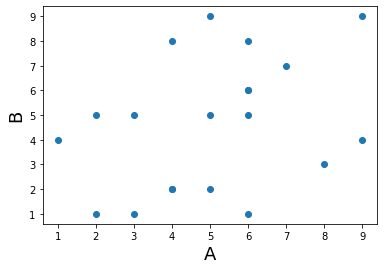

In [42]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1,10,20)
b = np.random.randint(1,10,20)

plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)

print('Dot Product: %s' % np.dot(a,b))

If two signals tend to point in the same direction, then they are **correlated**. Signals show a **positive correlation** if they tend to increase and decrease together. Signals show a **negative correlation** if one tends to increase when the other decreases, and vice-versa.

#### Exercise 3
What happens when we make the two variables more similar?

Suppose 
$$ y = x + randomNumber$$

Show correlation of $x, y$ by plot the result from given relation, 
$$ x = np.random.randint(1,10,20) $$


Dot Product: 818.8042649503604


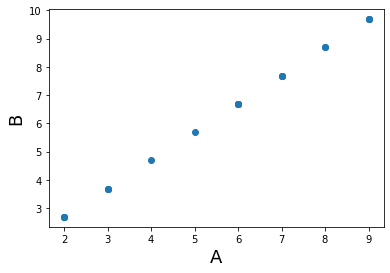

In [43]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1,10,20)
b = a + np.random.random()

plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)

print('Dot Product: %s' % np.dot(a,b))

### Correlation with Sine Signal

The following code allow us to dot produce to **measure similarity of any signal with sine funciton**.
The area under this curve is shaded, as it represents the sum of the products.1 The sum of the products is the dot product. 

We try to detect sin signal at any phase shifted of unknow_signal. 

If we get unkown_singal and we want to know whether it contain a sin signal at particular frequency.
There are three cases in the following code, zero phase shift in unknow_signal, 60 degree and 90 degree phase shift.
You will see zero phase shift contain sin signal with $\theta = 0$ then sin detecor is work.

However please consider the unknow_signal phase shifted by 90 degree.

Area under graph:
Sin Detecting zero phase shifted signal 1303.797293808807


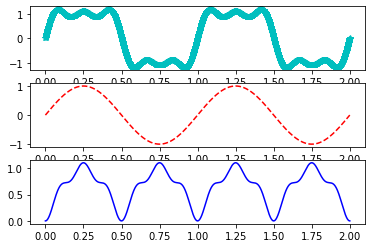

In [44]:
from numpy import sin, cos, pi, arange
import numpy as np
from matplotlib import pyplot as plt
Pi=pi
sampling_freq = 1024
t=time = arange(0, 2 + 1/sampling_freq, 1/sampling_freq)
amplitude = 1
freq = 1
theta = 0

#sin_detector = amplitude * sin(2 * pi * freq * time + theta)


unkown_signal = (4/Pi)*sin((2*Pi)*freq*t)+ (4/(3*Pi))*sin(3*2*Pi*freq*t) \
                + (4/(5*Pi))*sin(5*2*Pi*freq*t)

theta = np.radians(60)
unkown_signal_60 = (4/Pi)*sin(2*Pi*freq*t + theta ) + (4/(3*Pi))*sin(3*(2*Pi*freq*t + theta))  \
                    + (4/(5*Pi))*sin(5*(2*Pi*freq*t +theta))

theta = np.radians(90)
unkown_signal_90 = (4/Pi)*sin((2*Pi)*freq*t+ theta)+ (4/(3*Pi))*sin(3*(2*Pi*freq*t+ theta))  \
                + (4/(5*Pi))*sin(5*(2*Pi*freq*t + theta))

sin_0 = amplitude * sin(2 * pi * freq * time )

plt.figure()
plt.subplot(311)
plt.plot(time,unkown_signal,'c*')

plt.subplot(312)
plt.plot(time, sin_0,'r--')
sinDet0= np.multiply(unkown_signal, sin_0)

plt.subplot(313)
plt.plot(time, sinDet0,'b-')
print('Area under graph:')
print('Sin Detecting zero phase shifted signal',np.dot(unkown_signal, sin_0))


Area under graph:
Sin Detecting 60 phase shifted signal 651.8986469044032


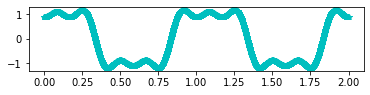

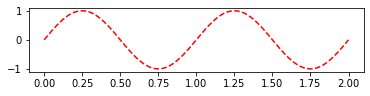

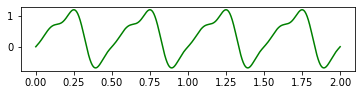

In [45]:
plt.figure()
plt.subplot(311)
plt.plot(time,unkown_signal_60,'c*')

plt.figure()
plt.subplot(312)
plt.plot(time, sin_0,'r--')

plt.figure()
plt.subplot(313)
sinDet60= np.multiply(unkown_signal_60, sin_0)
plt.plot(time, sinDet60,'g-')
print('Area under graph:')
print('Sin Detecting 60 phase shifted signal',np.dot(unkown_signal_60, sin_0))




Area under graph:
Sin Detecting 90 phase shifted signal 0.0


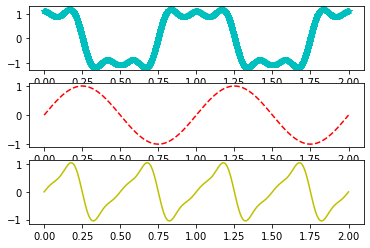

In [46]:

plt.figure()
plt.subplot(311)
plt.plot(time,unkown_signal_90,'c*')

plt.subplot(312)
sinDet90= np.multiply(unkown_signal_90, sin_0)
plt.plot(time, sin_0,'r--')


plt.subplot(313)
plt.plot(time, sinDet90,'y-')
print('Area under graph:')
print('Sin Detecting 90 phase shifted signal', np.floor(np.dot(unkown_signal_90,sin_0)))


#### Exercise 4:
What is about dot produce for detect 90 degree phase shifted with **unknow_signal**?

Could we use sin detector to detect 90 degree phase shifted?

So, what is the signal detector that can detect 90 degree phase shifted?


<mark>Answer</mark>  
0  
No, becasue it's independent.  
cos+sin

### Correlation with Sine and Consine
In previos section, we see that only **sine dector** cannot detect or correlate input signal with 90 degree phase shifted. To fix this issue, we can do two dot product instead of one with **consine wave**. Because consine wave is sine wave shifted by 90 degree so that make sure that we can detect all signals.


Area under graph:
Sin Detecting 90 degree phase shifted signal 0.0
Area under graph:
Cosine Detecting 90 phase shifted signal 1304.0


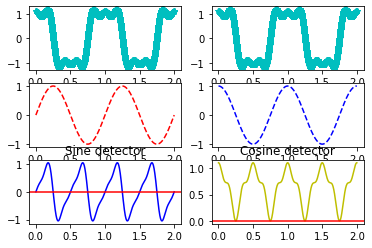

In [47]:
cos_0 = amplitude * cos(2 * pi * freq * time )

plt.figure()
ax1= plt.subplot(3,2,1)
ax1.plot(time,unkown_signal_90,'c*')

ax2=plt.subplot(3,2,3)
ax2.plot(time, sin_0,'r--')
sinDet0= np.multiply(unkown_signal_90, sin_0)

ax3=plt.subplot(3,2,5)
ax3.plot(time, sinDet0,'b-')
ax3.set_title('Sine detector')
ax3.axhline(y=0, color='r', linestyle='-')
print('Area under graph:')
print('Sin Detecting 90 degree phase shifted signal',np.floor(np.dot(unkown_signal_90, sin_0)))

###########################################

plt.subplot(3,2,2)
plt.plot(time,unkown_signal_90,'c*')

plt.subplot(3,2,4)
cosDet90= np.multiply(unkown_signal_90, cos_0)
plt.plot(time, cos_0,'b--')


plt.subplot(3,2,6)
plt.plot(time, cosDet90,'y-')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Cosine detector')
print('Area under graph:')
print('Cosine Detecting 90 phase shifted signal', np.floor(np.dot(unkown_signal_90,cos_0)))




# Introduction to Discrete Fourier Transfrom

Consider following code for generating any signal with sin function

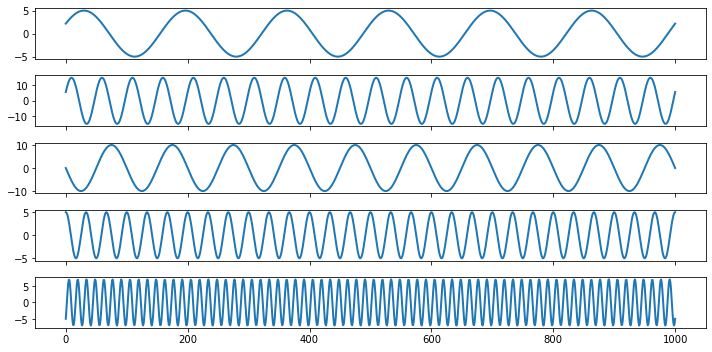

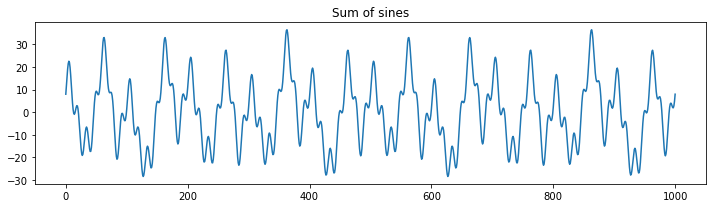

In [48]:
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(10,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
plt.tight_layout()    


plt.figure(figsize=(10,3))
plt.plot(np.sum(sine_waves, axis=0))
plt.title("Sum of sines")
plt.tight_layout()    

We noted that one can create any signal by modify **Amplitude, Frequency and phase of Sin wave**

#### Exercise 5
We want to create square wave,$x[n]$ for given function:

$$ x[n] = \frac{4}{\pi} \sum_{k=1,3,5,7....} \frac{1}{k}sin(2\pi kfn+ \phi)$$
Assumed $\phi =0$, f is frequency of fundamental frequency of Square wave and $k={1,3,5,7}$


<pre><code>sampling_freq = 500

freq = [1, 3, 5 ,7]
dft_coef = [1/1, 1/3, 1/5, 1/7]

amplitude = [x * 4/pi for x in dft_coef]

phases = pi*np.array([0, 0, 0, 0])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)
</code></pre>

# Frequency Domain
From previous exercise, we can create square wave from **odd frequency of sin waves**.
In practices, having got input data or sensor signal, we want to know how that signal created. 
Sometime real signal normally come with noise and unwanted signal, we need to identify frequency in many ways.

Fouirier come with great idea in mathematics and technology that we can applied in signal detection, image filtering and
mobile transmission.

Result of $$ x[n] = \frac{4}{\pi} \sum_{k=1,3,5,7} \frac{1}{k}sin(2\pi kfn+ \phi)$$
derived from **Fourier series** in which define as
$$ DFT[k] = \sum_{n=0}^{N-1}x[n]\cdot(cos\space \theta - j\cdot sin \space \theta)$$
Where N = len() of data

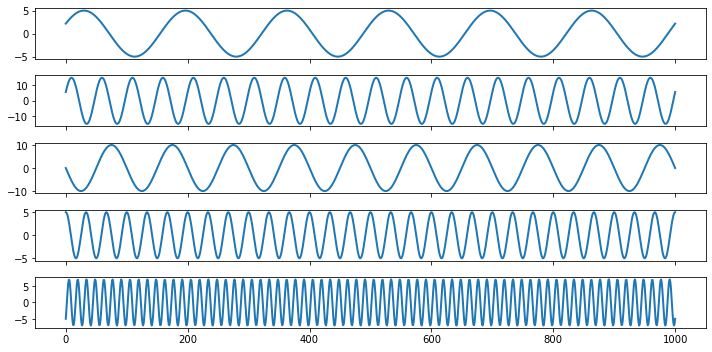

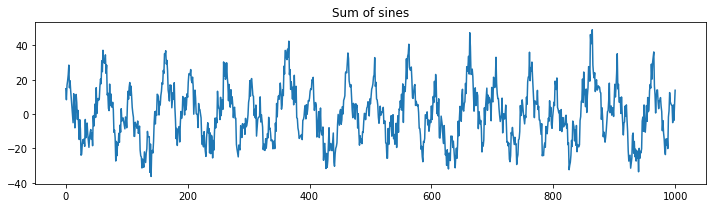

In [49]:
# code F1...

sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))



sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(10,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
plt.tight_layout()    

# Real world added noise to signal
noise = 5 * np.random.randn(sine_waves.shape[1])

signal = np.sum(sine_waves, axis=0) + noise


plt.figure(figsize=(10,3))
plt.plot(signal)
plt.title("Sum of sines")
plt.tight_layout()    

#### Frequency Domain Plot
Supposed unknow signal is sum of sin wave in previous code.
We will correlate with complex sin wave(precision and useful from of sin signal)


In [50]:
import numpy as np
from numpy import exp

time = np.arange(0, len(signal), 1)/len(signal)

sine_waves = []
for i in range(len(signal)):
    sine_waves.append(exp(-1j*2*pi*i*time))
sine_waves = np.array(sine_waves)

**Big or main point of the week is the following line**

In [51]:
fourier = np.dot(signal, sine_waves)

# Fourier series is not thing but measure signals similarity for every frequency,
# with dot product



Text(0, 0.5, 'Amplitude')

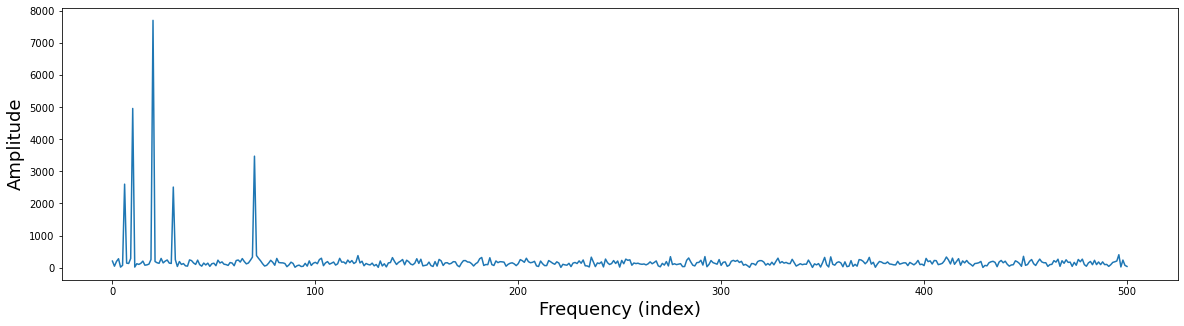

In [52]:
plt.figure(figsize=(20,5))
plt.plot(np.abs(fourier[0:int(np.ceil(len(fourier)/2))]))
plt.xlabel('Frequency (index)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

#### Exercise 6
Look at the Frequency domain result, 
What is freq and their amplitude compare to the code F1.

freq = [...]
amplitude = [...]

(When we created signal.)  
freq = [1, 3 ,5, 7] & amplitude = [1, 1/3, 1/5, 1/7]

#### Exercise 7
From the following code, plot the frequencies  that built up the signal

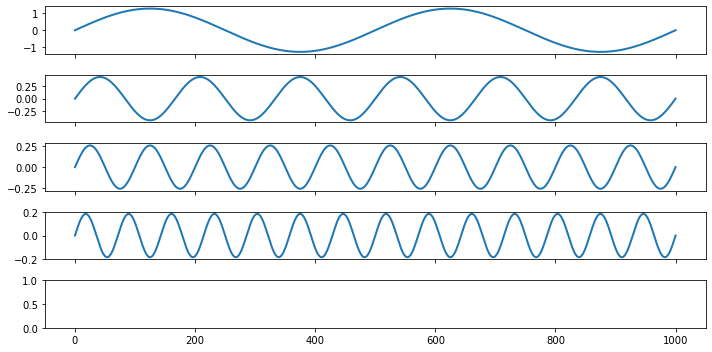

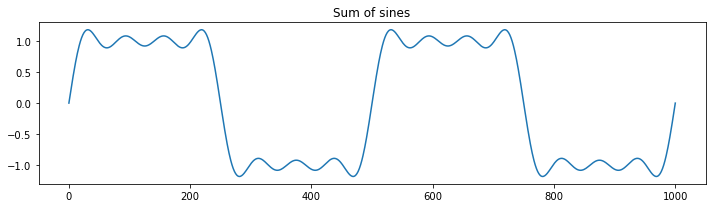

In [53]:
sampling_freq = 500

freq = [1, 3, 5 ,7]
dft_coef = [1/1, 1/3, 1/5, 1/7]

amplitude = [x * 4/pi for x in dft_coef]

phases = pi*np.array([0, 0, 0, 0])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)

f,a = plt.subplots(nrows=5, ncols=1, figsize=(10,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
plt.tight_layout()    


plt.figure(figsize=(10,3))
plt.plot(np.sum(sine_waves, axis=0))
plt.title("Sum of sines")
plt.tight_layout()   
###############   End of Builder, Time Domain Signal#########################
###### Begin of Frequency Domain ###########################
signal = np.sum(sine_waves, axis=0)

time = np.arange(0, len(signal), 1)/len(signal)

sine_waves = []
for i in range(len(signal)):
    sine_waves.append(exp(-1j*2*pi*i*time))

fourier = np.dot(signal, sine_waves)

Text(0, 0.5, 'Amplitude')

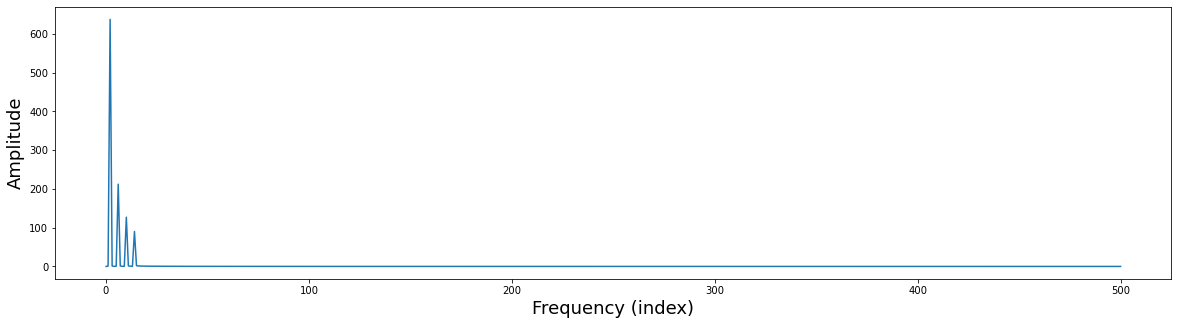

In [54]:
plt.figure(figsize=(20,5))
plt.plot(np.abs(fourier[0:int(np.ceil(len(fourier)/2))]))
plt.xlabel('Frequency (index)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

## Inverse Fourier Serier

Inverse of fourier transform is dot product of **fourier_tranformed** with the sin wave

#### Exercise 8
Modify following code to get back orignal signal by above fact of inverse fouier serier.
Show orignal signal, frequncy domain plot, and inverse Fourier series

Text(0.5, 0, 'Time')

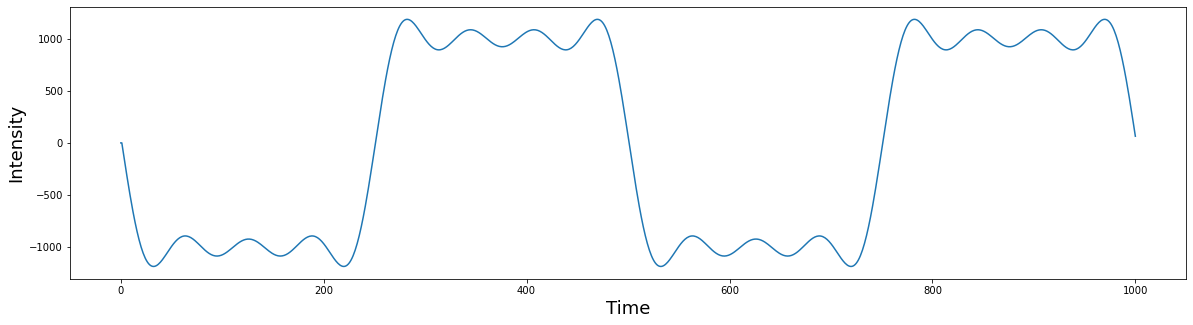

In [55]:
fourier = np.dot(signal, sine_waves)
#int_dft = np.dot(sine_waves, signal)

plt.figure(figsize=(20,5))
plt.plot(np.dot(fourier, sine_waves))
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

fourier = np.dot(signal, sine_waves)
inv_dft = ?

Text(0.5, 6.0, 'Time')

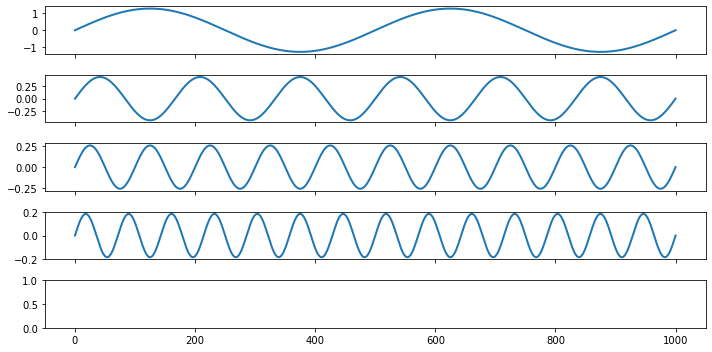

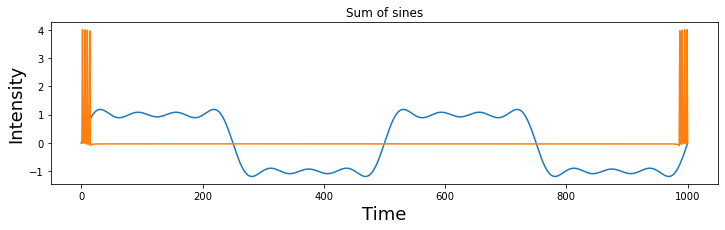

In [56]:
sampling_freq = 500

freq = [1, 3, 5 ,7]
dft_coef = [1/1, 1/3, 1/5, 1/7]

amplitude = [x * 4/pi for x in dft_coef]

phases = pi*np.array([0, 0, 0, 0])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)

f,a = plt.subplots(nrows=5, ncols=1, figsize=(10,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
plt.tight_layout()    


plt.figure(figsize=(10,3))
plt.plot(np.sum(sine_waves, axis=0))
plt.title("Sum of sines")
plt.tight_layout()   
###############   End of Builder, Time Domain signal generator #########################

###### Begin of Fourier Series ###########################33
signal = np.sum(sine_waves, axis=0)

time = np.arange(0, len(signal), 1)/len(signal)

sine_waves = []
for i in range(len(signal)):
    sine_waves.append(exp(-1j*2*pi*i*time))

fourier = np.dot(signal, sine_waves)

####### from Exercise 7  output fourier transform ######
#### Exercise 8 You know only fourier transform of signal ###
### how  to get original signal back ####

### Begin of Invers Fourier Series, recovery Time domain signal from Fourier Series###

inv_dft = np.dot(sine_waves, signal)


plt.plot(inv_dft)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

Sources:

https://dartbrains.org/features/notebooks/5_Signal_Processing.html